# Text classification - Deep Learining Project
### **Purpose**: Predicting verdicts for Reddit Posts (Guilty/Not Guilty)
Created: 29.01.2025

### Notes
- Download assosiated files from: https://drive.google.com/drive/folders/1VmTGtCu21Gg8aPz-Uxff9Fqu2lvxIZ8p?usp=sharing 
 1. Download the data csv and place it in the same directory as this file. 
 2. Download the 'Glove' txt file and place it in the same directory as this file. 
- Different OS and Hardware can produce different results - this projects ran on Macbook Pro m3 - 16gb ram. 

In [ ]:
# import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import re

# define random seed
np.random.seed(42)
tf.random.set_seed(10) # 10

data = pd.read_csv(f"../data/aita_verdicts_unique_6000.csv")

data.head()

[nltk_data] Downloading package stopwords to /Users/nird/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,pid,title,post,full post,verdict
0,1hlt64m,AITA for not appreciating a Christmas gift?,"With the holidays here, my family opened our c...",AITA for not appreciating a Christmas gift? W...,user_is_fault
1,1hlhp05,WIBTA for asking for a portion of my money bac...,"Sorry for the format, I am on mobile, and engl...",WIBTA for asking for a portion of my money bac...,user_is_fault
2,1hlsetw,AITA for telling people I'm not having fun whe...,"This one is general. I am a guy who, when I do...",AITA for telling people I'm not having fun whe...,user_is_fault
3,1hle8te,AITA for buying a Nintendo Switch for my Nephe...,I bought my 2 nephews age 4 & 6 a Nintendo Swi...,AITA for buying a Nintendo Switch for my Nephe...,user_is_fault
4,1hleyy6,AITA for not getting my mom a Christmas gift,I (19M) am a university student who lives at h...,AITA for not getting my mom a Christmas gift ...,user_is_fault


### Data Loading

In [3]:
#  keep only the columns we need
data = data[['title','post', 'verdict']]
data.head()

,title,post,verdict
0,AITA for not appreciating a Christmas gift?,"With the holidays here, my family opened our c...",user_is_fault
1,WIBTA for asking for a portion of my money bac...,"Sorry for the format, I am on mobile, and engl...",user_is_fault
2,AITA for telling people I'm not having fun whe...,"This one is general. I am a guy who, when I do...",user_is_fault
3,AITA for buying a Nintendo Switch for my Nephe...,I bought my 2 nephews age 4 & 6 a Nintendo Swi...,user_is_fault
4,AITA for not getting my mom a Christmas gift,I (19M) am a university student who lives at h...,user_is_fault


### Cleaning and preprocessing

In [4]:
# encoding the labels
lbl_encoder = {'user_is_fault' : 0, 'user_ok' : 1}
data['verdict'] = data['verdict'].map(lbl_encoder)

data.head()


,title,post,verdict
0,AITA for not appreciating a Christmas gift?,"With the holidays here, my family opened our c...",0
1,WIBTA for asking for a portion of my money bac...,"Sorry for the format, I am on mobile, and engl...",0
2,AITA for telling people I'm not having fun whe...,"This one is general. I am a guy who, when I do...",0
3,AITA for buying a Nintendo Switch for my Nephe...,I bought my 2 nephews age 4 & 6 a Nintendo Swi...,0
4,AITA for not getting my mom a Christmas gift,I (19M) am a university student who lives at h...,0


In [4]:
# Preprocessing the text
stop_words = stopwords.words('english') # stopwords are words that do not add much meaning to a sentence
stemmer = SnowballStemmer('english') # stemming is the process of reducing a word to its root form
lemmatizer = nltk.WordNetLemmatizer() # lemmatization is the process of reducing a word to its root form too

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+" # regular expression to remove the unwanted characters (like emojis, links, etc.)

In [5]:
# add words to the stopwords list
stop_words.extend([
    'from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done',
    'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 
    'run', 'need', 'even', 'right', 'line', 'also', 'may', 'take', 'come', 'said', 'told', 'like', 'time', 'us', 'went', 'back', 
    'since', 'going', 'got', 'one', 'asked', 'really', 'still', 'saying', 'started', 'wanted', 'made', 'years', 'day', 'year', 
    'things', 'well', 'always', 'first', 'way', 'ago', 'something', 'called', 'last', 'around', 'thought', 'everyone', 'two', 
    'anything', 'edit', 'away', 'week', 'room', 'together', 'call', 'months', 'thing', 'trying', 'life', 'old', 'night', 'talk', 
    'every', 'later', 'wrong', 'days', 'everything', 'leave', 'long', 'times', 'next', 'though', 'sure', 'already', 'another', 
    'stop', 'someone', 'keep', 'bit', 'look', 'weeks', 'recently', 'person', 'big', 'whole', 'knew', 'maybe', 'ever', 'hours', 
    'instead', 'actually', 'move', 'couple', 'trip', 'month', 'post', 'children', 'fine', 'problem', 'else', 'etc', 'kind', 
    'past', 'issue', 'working', 'end', 'sent', 'needs', 'great', 'looked', 'group', 'reason', 'update', 'half', 'gets', 'start', 
    'sorry', 'almost', 'deal', 'alone', 'different', 'okay', 'probably', 'far', 'today', 'idea', 'support', 'anymore', 'door', 
    'buy', 'hour', 'brought', 'mean', 'anyway', 'honestly', 'rest', 'due', 'finally', 'bring', 'set', 'completely', 'minutes', 
    'especially', 'older', 'usually', 'least', 'comes', 'visit', 'turned', 'either', 'fact', 'thinking', 'weekend', 'huge', 
    'clear', 'late', 'longer', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', 'much', 'aita', 'asking', 'ask', 'asks', 
    'telling', 'told', 'tell', 'tells', 'calling', 'called', 'calls', 'best'
])


In [6]:
data.loc[2]['title'] + ' -> ' + data.loc[2]['post']

'AITA for telling people I\'m not having fun when they ask and I\'m genuinely not? -> This one is general. I am a guy who, when I don\'t enjoy something, I\'ll tell you I don\'t, but if I commit to something, I\'ll see it through to the end without complaining.\n\nThis comes to a head where I was on vacation with my older brother in Arizona, who wanted to do a lot of nature hikes. Nature hikes are fine. I don\'t *mind* them, but I do dislike walking up large hills. Walking downhill is the easiest thing ever, it\'s like being nature\'s passenger princess. You just put your foot forward and let gravity do all the work. Walking uphill conversely is very draining and leaves me sweaty.\n\nI don\'t make a point to complain about something when I do it, so when I was walking uphill, despite not liking it much, I held basic conversation with my brother. \n\nAs we were heading back down, he asked me if I was having fun and I said no. Not because of any fault of my brother, I just didn\'t find t

In [7]:
# removing stopwords
def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

for c in data.columns:
    if c == 'verdict': continue
    print(f'Preprocessing column: {c}')
    # lowercasing the text
    data[c] = data[c].astype(str).str.lower()
    # removing unwanted characters and stopwords
    data[c] = data[c].apply(lambda x: preprocess(x, stem=False))
    # removing non alphabetic characters and removing digits
    data[c] = data[c].str.replace('[^a-zA-Z]', ' ')
    data[c] = data[c].str.replace(r'\d+', '', regex=True)
    # remove too many spaces
    data[c] = data[c].str.replace(r'\s+', ' ', regex=True)

data.head()

Preprocessing column: title
Preprocessing column: post


,title,post,verdict
0,appreciating christmas gift,holidays family opened christmas presents litt...,0
1,wibta portion money friend selling gift gave,format mobile english language f maid honor fr...,0
2,people fun genuinely,general guy enjoy commit without complaining h...,0
3,buying nintendo switch nephews x mas,bought nephews age nintendo switch december rd...,0
4,getting mom christmas gift,m university student lives home parents job re...,0


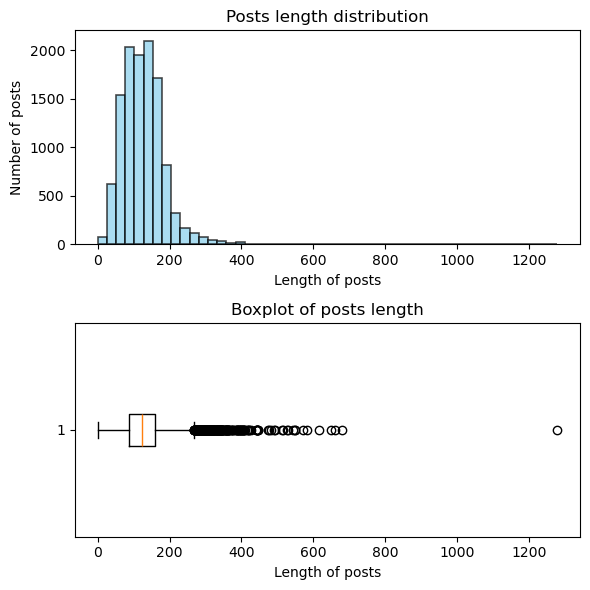

In [8]:
# plot posts length distribution with histogram and boxplot
fig, ax = plt.subplots(2, 1, figsize=(6, 6))

# Histogram
ax[0].hist([len(post.split()) for post in data['post']], bins=50, color='skyblue' , edgecolor='black', linewidth=1.2, alpha=0.7)
ax[0].set_xlabel('Length of posts')
ax[0].set_ylabel('Number of posts')
ax[0].set_title('Posts length distribution')

# Boxplot
ax[1].boxplot([len(post.split()) for post in data['post']], vert=False)
ax[1].set_xlabel('Length of posts')
ax[1].set_title('Boxplot of posts length')

plt.tight_layout()
plt.show()

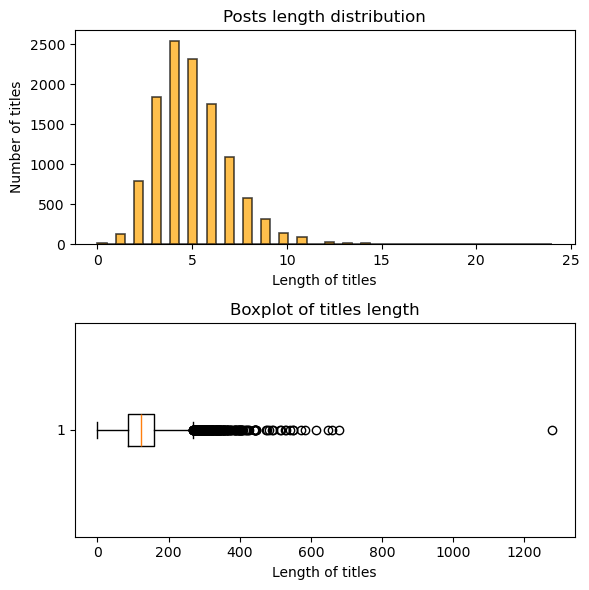

In [9]:
# plot post titlets length distribution with histogram and boxplot
fig, ax = plt.subplots(2, 1, figsize=(6, 6))

# Histogram
ax[0].hist([len(title.split()) for title in data['title']], bins=50, color='orange' , edgecolor='black', linewidth=1.2, alpha=0.7)
ax[0].set_xlabel('Length of titles')
ax[0].set_ylabel('Number of titles')
ax[0].set_title('Posts length distribution')

# Boxplot
ax[1].boxplot([len(title.split()) for title in data['post']], vert=False)
ax[1].set_xlabel('Length of titles')
ax[1].set_title('Boxplot of titles length')

plt.tight_layout()
plt.show()

- Using the plots above we can decide the max length of the text
- and, to see if there are any outliers in the data

In [10]:
# print example of post and title where and post length = 0
print(data[data['post'].apply(lambda x: len(x)) == 0])

                                  title post  verdict
3052                         wife drink             0
5299  new female employee cry questions             0


In [11]:
# print example of post and title where and title length = 0
print(data[data['title'].apply(lambda x: len(x)) == 0])

      title                                               post  verdict
164           money parents hand quite wealthy context play...        0
271          tale alas military wife veteran serving stay h...        0
291          hi chris friend seven people guy let fred like...        0
500          several dating spend quite stay work shift how...        0
502          argument husband husband works mine gone home ...        0
984          thanksgiving apparantly poorly received joke m...        0
2438         dating guy perfect never loved anyone never fe...        0
2684         dog corgi side kick fiance fiance dog currentl...        0
2690          rio de janeiro wow getting cool guy sweet beg...        0
3702         son jimmy dropped school feel attending privat...        0
5444         gf self employed stressed driving home open fe...        0
11500        f college wanting parents house tired travelli...        1


In [12]:
# override empty posts with 'empty post'
data.loc[data['post'].apply(lambda x: len(x)) == 0, 'post'] = 'empty post'
data.loc[data['title'].apply(lambda x: len(x)) == 0, 'title'] = 'empty title'

# how many posts left from each label
data.groupby('verdict').size()

verdict
0    5670
1    6000
dtype: int64

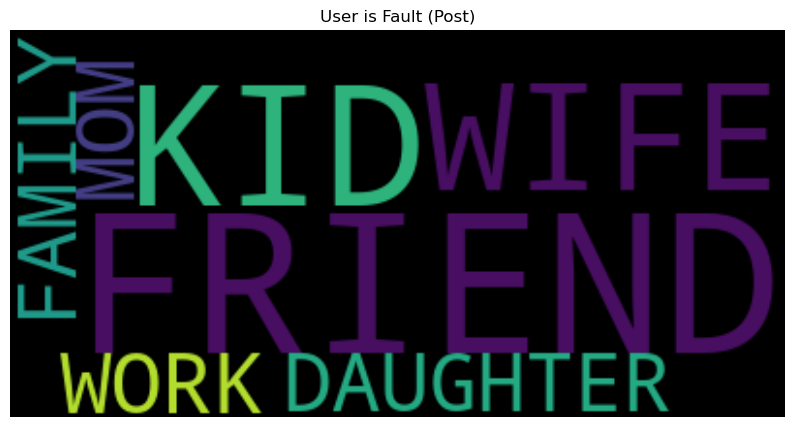

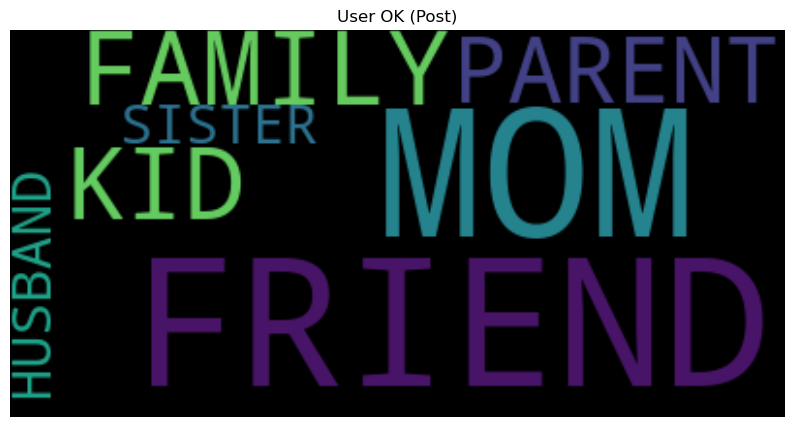

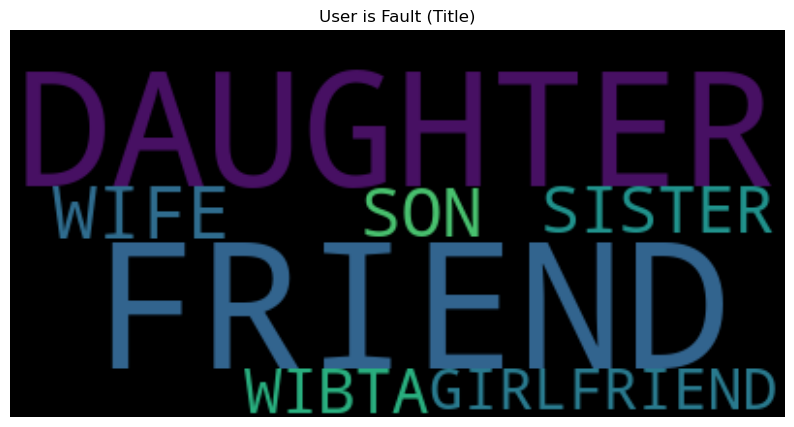

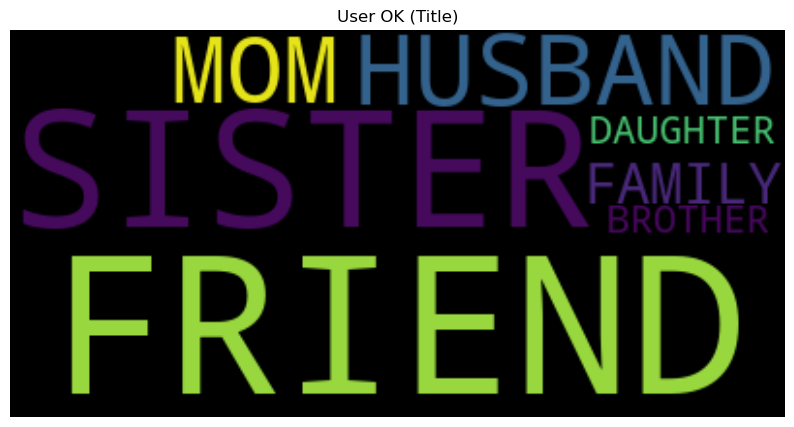

In [13]:
# word clouds to see the most common words in each label and detect noises

from wordcloud import WordCloud

def create_word_cloud(data, title):
    wordcloud = WordCloud(background_color='black', stopwords = stop_words, max_words=7).generate(" ".join([i for i in data.str.upper()]))
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# for each verdict, we will create a word cloud
create_word_cloud(data[data['verdict'] == 0]['post'], 'User is Fault (Post)')
create_word_cloud(data[data['verdict'] == 1]['post'], 'User OK (Post)')
create_word_cloud(data[data['verdict'] == 0]['title'], 'User is Fault (Title)')
create_word_cloud(data[data['verdict'] == 1]['title'], 'User OK (Title)')

In [14]:
data['full_post'] = data['title'] + ' ' + data['post'] # combining the title and the post

In [15]:
data.iloc[2]['full_post']

'people fun genuinely general guy enjoy commit without complaining head vacation brother arizona nature hikes nature hikes mind dislike walking large hills walking downhill easiest nature passenger princess put foot forward let gravity work walking uphill conversely draining leaves sweaty point complain walking uphill despite liking held basic conversation brother heading fun fault brother find activity fun bad satisfactory driving airport flight home fun understand demoralizing hear fun people opinion upset give honest answer fun fun'

### Splitting the data

In [16]:
train_size = 0.85
train_data, test_data = train_test_split(data, test_size=1-train_size, random_state=42)

print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

train_data.head()

Train Data size: 9919
Test Data size 1751


,title,post,verdict,full_post
3464,becoming frustrated bf commenting bra facetime,boyfriend distance facetime tonight looking pa...,0,becoming frustrated bf commenting bra facetime...
11360,rejecting christmas present,f animal lover annoying extent admit read anim...,1,rejecting christmas present f animal lover ann...
2688,dude local community theatre scene crazy quit ...,weird happens community theatre live close la ...,0,dude local community theatre scene crazy quit ...
8250,sit reserved train seat people trains cancelled,f live uk trains travel family friends situati...,1,sit reserved train seat people trains cancelle...
373,clapping sister sang voice class,sister taking voice class community college re...,0,clapping sister sang voice class sister taking...


In [17]:
x_train_post = train_data['full_post']
x_test_post = test_data['full_post']

y_train = train_data['verdict']
y_test = test_data['verdict']

### Encoding and Embedding

In [18]:
encoder = LabelEncoder()
encoder.fit(train_data.verdict.to_list())

y_train = encoder.transform(train_data.verdict.to_list())
y_test = encoder.transform(test_data.verdict.to_list())


print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (9919,)
y_test shape: (1751,)


In [19]:
# clac length of 95 precentile of the posts
data_max_len = int(np.percentile([len(post.split()) for post in x_train_post], 95))


In [20]:
MAX_NB_WORDS = 10000  # the maximum number of words to keep, based on word frequency
MAX_SEQUENCE_LENGTH = data_max_len # we will keep all the posts of length of max_sequence_length (length in words)
EMBEDDING_DIM = 100 # the dimension of the word embeddings

In [21]:
# create vocabulary
vocab = {}
for post in train_data['full_post']:
    for word in post.split():
        if word not in vocab:
            vocab[word] = 1
        else:
            vocab[word] += 1

# sort the vocabulary based on frequency and limit to MAX_NB_WORDS
vocab = dict(sorted(vocab.items(), key=lambda x: x[1], reverse=True)[:MAX_NB_WORDS])
vocab_size = len(vocab)
print("Vocabulary size:", vocab_size)

# create a tokenizer based on the limited vocabulary we created
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_data['full_post'])

# convert the text to sequence
x_train = tokenizer.texts_to_sequences(train_data['full_post'])
x_test = tokenizer.texts_to_sequences(test_data['full_post'])

# padding the sequence
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

word_index = tokenizer.word_index

Vocabulary size: 10000


In [22]:
# tokenized post vs original post
print("Original Post:")
print(train_data.iloc[0]['full_post'])
print("Tokenized Post:")
print(x_train[0])

Original Post:
becoming frustrated bf commenting bra facetime boyfriend distance facetime tonight looking papers stuff bed phone propped pillow apparently quick view bra truely care less saw bra chose wait bed blurted goodnight bra idk personally type appreciates types comments unless fits mood lmao yes feel getting mad waited hanging tactic stay phone
Tokenized Post:
[1564  659  250 2221 2425 3059   48 1063 3059  898  126 3060   65  134
   77 3975  163  974 1083 2425   43  171  106 2425  535  352  134 5026
 5837 2425  994  751  577 6018 2702  107  591 4544 1137 4043  131   14
   24   90  903  723   54   77    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0 

In [23]:
print("Training X Shape:",x_train.shape)
print("Training Y Shape:",y_train.shape)
print("Testing X Shape:",x_test.shape)
print("Testing Y Shape:",y_test.shape)
print("Vocabulary Size:", vocab_size)
print("Max Sequence Length:", MAX_SEQUENCE_LENGTH)

Training X Shape: (9919, 229)
Training Y Shape: (9919,)
Testing X Shape: (1751, 229)
Testing Y Shape: (1751,)
Vocabulary Size: 10000
Max Sequence Length: 229


In [24]:
# plot loss and accuracy

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

### Building the models
Import TensorFlow Layers and others

In [25]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

embedding_layer = Embedding(vocab_size, EMBEDDING_DIM)


In [26]:
# basic text classification model
def create_model():
    # post input
    input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    x = embedding_layer(input)
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x = Bidirectional(LSTM(64))(x)

    output = Dense(1, activation='sigmoid')(x)



    model = Model(inputs=input, outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()

model.summary()

# train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=3, 
                    validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 229)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 229, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 229, 128)       │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,183,425 (4.51 MB)

 Trainable params: 1,183,425 (4.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
310/310 ━━━━━━━━━━━━━━━━━━━━ 53s 167ms/step - accuracy: 0.5816 - loss: 0.6645 - val_accuracy: 0.6436 - val_loss: 0.6288
Epoch 2/3
310/310 ━━━━━━━━━━━━━━━━━━━━ 63s 202ms/step - accuracy: 0.7455 - loss: 0.5104 - val_accuracy: 0.6465 - val_loss: 0.6959
Epoch 3/3
310/310 ━━━━━━━━━━━━━━━━━━━━ 64s 205ms/step - accuracy: 0.8846 - loss: 0.2941 - val_accuracy: 0.5991 - val_loss: 0.9590


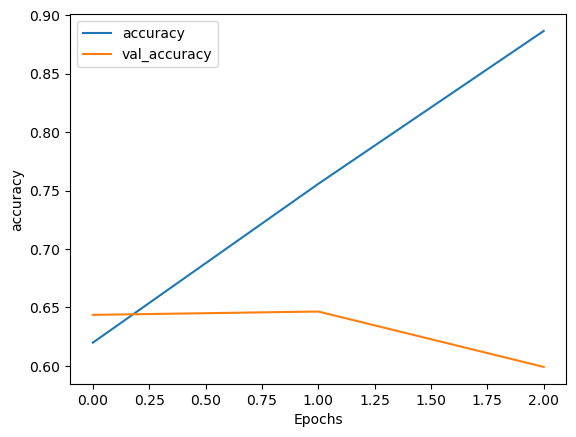

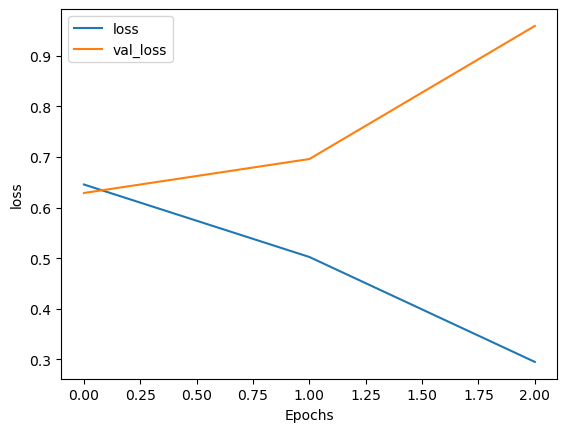

In [27]:
# graph
plot_graphs(history, "accuracy") # plots the accuracy of the model
plot_graphs(history, "loss") # plots the loss of the model

- It is clear that the model is overfitting the training data

In [28]:
# model evaluation
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# predict on test data
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred, target_names=lbl_encoder.keys()))

55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.6114 - loss: 0.9250
Test Loss: 0.9590136408805847
Test Accuracy: 0.5990862250328064
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
               precision    recall  f1-score   support

user_is_fault       0.57      0.68      0.62       841
      user_ok       0.64      0.53      0.58       910

     accuracy                           0.60      1751
    macro avg       0.60      0.60      0.60      1751
 weighted avg       0.61      0.60      0.60      1751



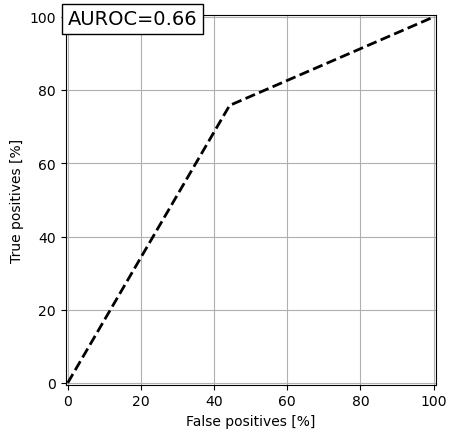

In [71]:
import sklearn.metrics

def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100.5])
  plt.ylim([-0.5,100.5])
  plt.grid(True)
  auroc = sklearn.metrics.roc_auc_score(labels, predictions)
  plt.text(0,98, 'AUROC=%.2f' % auroc, fontsize=14, bbox=dict(facecolor='white'))

  ax = plt.gca()
  ax.set_aspect('equal')

plot_roc("Test Baseline", y_test, y_pred, color='k', linestyle='--')

### Second Attempt

In [36]:
# attempting to improve the model by adding dropout layers
def create_model():
    # post input
    input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    x = embedding_layer(input)
    x = Dropout(0.5)(x)
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x=Dropout(0.5)(x)
    x = Bidirectional(LSTM(64))(x)

    output = Dense(1, activation='sigmoid')(x)



    model = Model(inputs=input, outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()

model.summary()

# train the model
history = model.fit(x_train, y_train, batch_size=36, epochs=3, 
                    validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 229)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 229, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 229, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 229, 128)       │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 229, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,183,425 (4.51 MB)

 Trainable params: 1,183,425 (4.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
310/310 ━━━━━━━━━━━━━━━━━━━━ 54s 169ms/step - accuracy: 0.8368 - loss: 0.3624 - val_accuracy: 0.6117 - val_loss: 0.9718
Epoch 2/3
310/310 ━━━━━━━━━━━━━━━━━━━━ 62s 200ms/step - accuracy: 0.9073 - loss: 0.2462 - val_accuracy: 0.6042 - val_loss: 1.1659
Epoch 3/3
310/310 ━━━━━━━━━━━━━━━━━━━━ 63s 202ms/step - accuracy: 0.9392 - loss: 0.1776 - val_accuracy: 0.5837 - val_loss: 1.4372


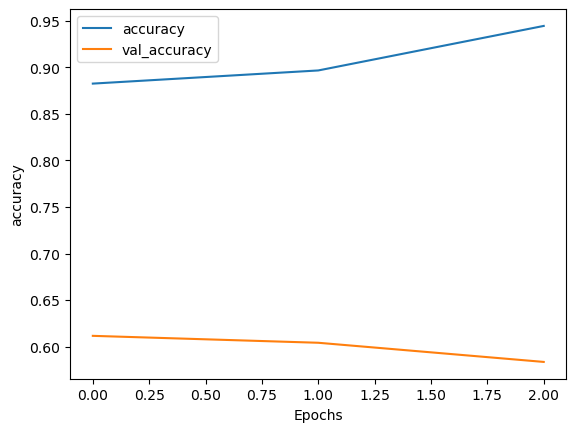

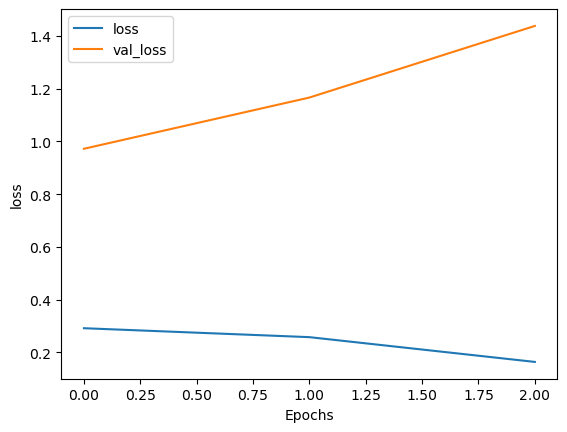

In [37]:
# graph
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

- its still overfitting

In [38]:
# model evaluation
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# predict on test data
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred, target_names=lbl_encoder.keys()))

55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5877 - loss: 1.4315
Test Loss: 1.4372345209121704
Test Accuracy: 0.5836665034294128
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step
               precision    recall  f1-score   support

user_is_fault       0.56      0.63      0.59       841
      user_ok       0.61      0.54      0.57       910

     accuracy                           0.58      1751
    macro avg       0.59      0.59      0.58      1751
 weighted avg       0.59      0.58      0.58      1751



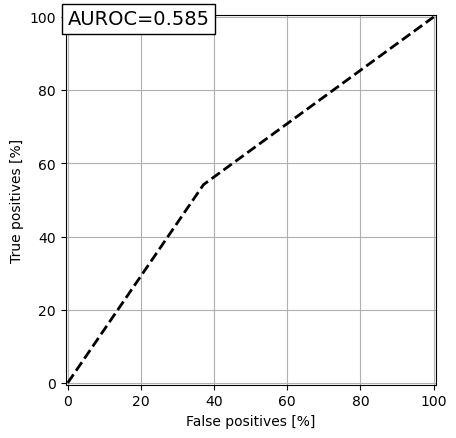

In [39]:
plot_roc("Test Baseline", y_test, y_pred, color='k', linestyle='--')

### Third attempt
Main Idea: **Spliting Title from Post**
- The intuition is that the title and the post add different values to the analysis and should be treated differently.

In [40]:
# split train and test data to x and y
# train
x_train_post = train_data['post']
x_train_title = train_data['title']

y_train = train_data['verdict']

# test
x_test_post = test_data['post']
x_test_title = test_data['title']

y_test = test_data['verdict']

In [41]:
encoder = LabelEncoder()
encoder.fit(train_data.verdict.to_list())

y_train = encoder.transform(train_data.verdict.to_list())
y_test = encoder.transform(test_data.verdict.to_list())


print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


y_train shape: (9919,)
y_test shape: (1751,)


In [42]:
# clac length of 95 precentile of the posts
posts_max_len = int(np.percentile([len(post.split()) for post in x_train_post], 95))
print("Max length of post:", posts_max_len)
# clac length of 95 precentile of the titles
titles_max_len = int(np.percentile([len(title.split()) for title in x_train_title], 95))
print("Max length of title:", titles_max_len)


Max length of post: 224
Max length of title: 9


In [43]:
# Tokenization
MAX_NB_WORDS = 10000  # the maximum number of words to keep, based on word frequency
MAX_SEQUENCE_LENGTH_POST = posts_max_len # we will keep all the posts of length of max_sequence_length (length in words)
MAX_SEQUENCE_LENGTH_TITLE = titles_max_len # we will keep all the titles of length of max_sequence_length


In [44]:
# custom tokenizer for aita posts

# create vocabulary
vocab = {}
for c in ['post', 'title']:
    for text in train_data[c]:
        for word in text.split():
            if word not in vocab:
                vocab[word] = 1
            else:
                vocab[word] += 1

# sort the vocabulary based on frequency and limit to MAX_NB_WORDS
vocab = dict(sorted(vocab.items(), key=lambda x: x[1], reverse=True)[:MAX_NB_WORDS])
vocab_size = len(vocab)
print("Vocabulary size:", vocab_size)


Vocabulary size: 10000


In [45]:

# create a tokenizer based on the limited vocabulary we created
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_data['post'] + train_data['title'])

# convert the text to sequence
x_train_post = tokenizer.texts_to_sequences(train_data['post'])
x_test_post = tokenizer.texts_to_sequences(test_data['post'])

x_train_title = tokenizer.texts_to_sequences(train_data['title'])
x_test_title = tokenizer.texts_to_sequences(test_data['title'])

# padding the sequence
x_train_post = tf.keras.preprocessing.sequence.pad_sequences(x_train_post, maxlen=MAX_SEQUENCE_LENGTH_POST, padding='post')
x_test_post = tf.keras.preprocessing.sequence.pad_sequences(x_test_post, maxlen=MAX_SEQUENCE_LENGTH_POST, padding='post')

x_train_title = tf.keras.preprocessing.sequence.pad_sequences(x_train_title, maxlen=MAX_SEQUENCE_LENGTH_TITLE, padding='post')
x_test_title = tf.keras.preprocessing.sequence.pad_sequences(x_test_title, maxlen=MAX_SEQUENCE_LENGTH_TITLE, padding='post')

word_index = tokenizer.word_index

In [46]:
# tokenized post vs original post
print("Original Post:")
print(train_data.iloc[0]['post'])
print("Tokenized Post:")
print(x_train_post[0])

# tokenized title vs original title
print("Original Title:")
print(train_data.iloc[0]['title'])
print("Tokenized Title:")
print(x_train_title[0])


Original Post:
boyfriend distance facetime tonight looking papers stuff bed phone propped pillow apparently quick view bra truely care less saw bra chose wait bed blurted goodnight bra idk personally type appreciates types comments unless fits mood lmao yes feel getting mad waited hanging tactic stay phone
Tokenized Post:
[  48 1054 3056  898  125 3075   65  134   76 3942  161  946 1084 2412
   43  169  105 2412  529  348  134 4984 5804 2412 1029  746  571 5976
 2677  108  582 4503 1143 4504  129   14   28   94  886  726   54   76
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0  

In [47]:
y_train

array([0, 1, 0, ..., 0, 0, 1])

In [48]:
# print the shape of the data
print("x_train_post shape:", x_train_post.shape)
print("x_test_post shape:", x_test_post.shape)
print("x_train_title shape:", x_train_title.shape)
print("x_test_title shape:", x_test_title.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train_post shape: (9919, 224)
x_test_post shape: (1751, 224)
x_train_title shape: (9919, 9)
x_test_title shape: (1751, 9)
y_train shape: (9919,)
y_test shape: (1751,)


In [49]:
print("word index len:",len(word_index))
print(word_index['daughter'])
print(vocab_size)

word index len: 41139
16
10000


#### Embeddig with GloVe

In [ ]:
# embeddding using glove
# glove is a pretrained word embedding model that knows the meaning of words and their context
# donmload the glove model from the google drive link above
import numpy as np
GLOVE_EMB = r'../data/glove.6B.100d.txt'
EMBEDDING_DIM = 100 # this is the dimension of the word embeddings that GloVe provides

embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))
print('Embedding index:', embeddings_index['go'])

embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
print(embedding_matrix.shape)
print(embedding_matrix[0])
for word, i in word_index.items():
  print(word, i)
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None and i < vocab_size:
    embedding_matrix[i] = embedding_vector

print(embedding_matrix[1])

Found 400000 word vectors.
Embedding index: [-0.078894  0.4616    0.57779  -0.71637  -0.13121   0.4186   -0.29156
  0.52006   0.089986 -0.35062   0.51755   0.51998   0.15218   0.41485
 -0.12377  -0.37222   0.0273    0.75673  -0.8739    0.58935   0.46662
  0.62918   0.092603 -0.012868 -0.015169  0.25567  -0.43025  -0.77668
  0.71449  -0.3834   -0.69638   0.23522   0.11396   0.02778   0.071357
  0.87409  -0.1281    0.063576  0.067867 -0.50181  -0.28523  -0.072536
 -0.50738  -0.6914   -0.53579  -0.11361  -0.38234  -0.12414   0.011214
 -1.1622    0.037057 -0.18495   0.01416   0.87193  -0.097309 -2.3565
 -0.14554   0.28275   2.0053    0.23439  -0.38298   0.69539  -0.44916
 -0.094157  0.90527   0.65764   0.27628   0.30688  -0.57781  -0.22987
 -0.083043 -0.57236  -0.299    -0.81112   0.039752 -0.05681  -0.48879
 -0.18091  -0.28152  -0.20559   0.4932   -0.033999 -0.53139  -0.28297
 -1.4475   -0.18685   0.091177  0.11454  -0.28168  -0.33565  -0.31663
 -0.1089    0.10111  -0.23737  -0.64955  -0.

In [51]:
# transfer learning using glove
from tensorflow.keras.layers import Embedding

embedding_layer_post = Embedding(vocab_size, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH_POST, trainable=False)
embedding_layer_title = Embedding(vocab_size, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH_TITLE, trainable=False)


/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [110]:
# model


def create_basic_model2():
    post_input = Input(shape=(MAX_SEQUENCE_LENGTH_POST,), dtype='int32')
    title_input = Input(shape=(MAX_SEQUENCE_LENGTH_TITLE,), dtype='int32')

    title_emb = embedding_layer_title(title_input)
    post_emb = embedding_layer_post(post_input)

    # LSTM layer for title
    title_lstm = Bidirectional(LSTM(128, dropout=0.5 ,return_sequences=True))(title_emb)
    title_lstm = GlobalMaxPooling1D()(title_lstm)

    # CNN + LSTM layers for post
    post_conv = Conv1D(64, 3, activation='relu')(post_emb)
    post_pool = AveragePooling1D(5)(post_conv)
    post_lstm = Bidirectional(LSTM(128, dropout= 0.5, return_sequences=True))(post_pool)
    post_lstm = GlobalMaxPooling1D()(post_lstm)

    # Concatenate title and post features
    x = Concatenate()([title_lstm, post_lstm])

    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)

    out = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[post_input, title_input], outputs=out)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_basic_model2()

model.summary()

# train the model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

history = model.fit([x_train_post, x_train_title], y_train, batch_size=36, epochs=7, 
                    validation_data=([x_test_post, x_test_title], y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_44      │ (None, 224)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 224, 100)  │  1,000,000 │ input_layer_44[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_45      │ (None, 9)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_21 (Conv1D)  │ (None, 222, 64)   │     19,264 │ embedding_1[21][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 9, 100)    │  1,000,000 │ input_layer_45[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_pooling1d_… │ (None, 44, 64)    │          0 │ conv1d_21[0][0]   │
│ (AveragePooling1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_46    │ (None, 9, 256)    │    234,496 │ embedding_2[21][… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_47    │ (None, 44, 256)   │    197,632 │ average_pooling1… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 256)       │          0 │ bidirectional_46… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 256)       │          0 │ bidirectional_47… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_21      │ (None, 512)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_44 (Dense)    │ (None, 128)       │     65,664 │ concatenate_21[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_23          │ (None, 128)       │          0 │ dense_44[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_45 (Dense)    │ (None, 1)         │        129 │ dropout_23[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,517,185 (9.60 MB)

 Trainable params: 517,185 (1.97 MB)

 Non-trainable params: 2,000,000 (7.63 MB)

Epoch 1/7


/opt/anaconda3/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_306', 'keras_tensor_307']. Received: the structure of inputs=('*', '*')
  warnings.warn(


276/276 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.5378 - loss: 0.6902 - val_accuracy: 0.6174 - val_loss: 0.6511
Epoch 2/7
276/276 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.6165 - loss: 0.6534 - val_accuracy: 0.6334 - val_loss: 0.6396
Epoch 3/7
276/276 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.6339 - loss: 0.6407 - val_accuracy: 0.6311 - val_loss: 0.6357
Epoch 4/7
276/276 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.6414 - loss: 0.6271 - val_accuracy: 0.6539 - val_loss: 0.6266
Epoch 5/7
276/276 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.6494 - loss: 0.6231 - val_accuracy: 0.6573 - val_loss: 0.6207
Epoch 6/7
276/276 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.6715 - loss: 0.6118 - val_accuracy: 0.6630 - val_loss: 0.6166
Epoch 7/7
276/276 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.6718 - loss: 0.6071 - val_accuracy: 0.6716 - val_loss: 0.6117


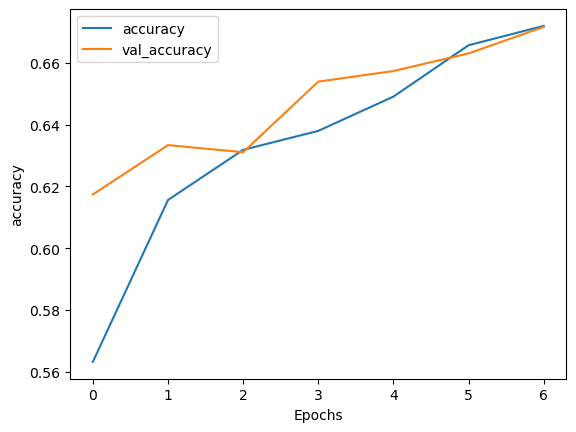

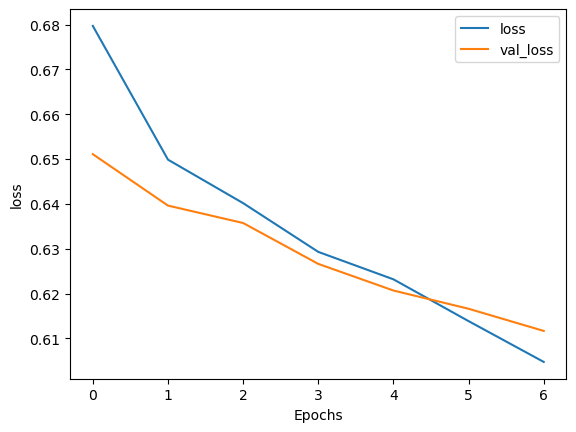

In [111]:
# graph
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

- The graphs are more stable now and the model is not overfitting the training data

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6802 - loss: 0.5970
Test loss: 0.6116748452186584
Test accuracy: 0.6716161966323853
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
              precision    recall  f1-score   support

           0       0.65      0.68      0.67       841
           1       0.69      0.66      0.68       910

    accuracy                           0.67      1751
   macro avg       0.67      0.67      0.67      1751
weighted avg       0.67      0.67      0.67      1751



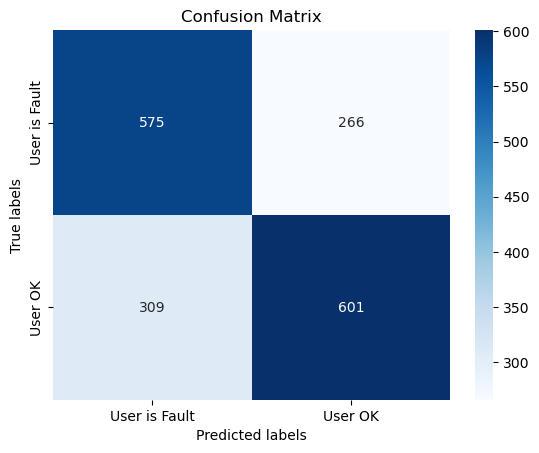

In [112]:
# evaluate the model
loss, accuracy = model.evaluate([x_test_post, x_test_title], y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

# predict the model
y_pred = model.predict([x_test_post, x_test_title])
y_pred = (y_pred > 0.5).astype(int).reshape(-1)

# confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['User is Fault', 'User OK'])
ax.yaxis.set_ticklabels(['User is Fault', 'User OK'])

print(classification_report(y_test, y_pred))

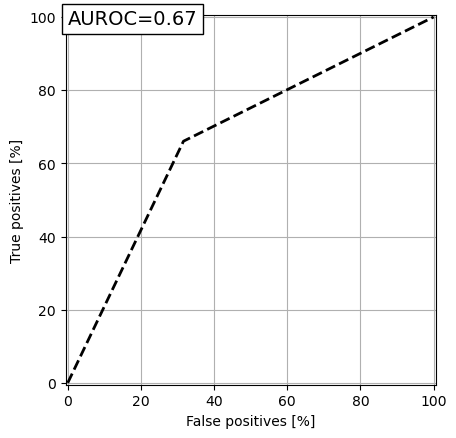

In [113]:
plot_roc("Test Baseline", y_test, y_pred, color='k', linestyle='--')

### Saving the model

In [86]:
# save the model
model.save('reddit_final_model.keras')

# load the model
from tensorflow.keras.models import load_model
model = load_model('reddit_final_model.keras')

### Comparing to ChatGPT Api

In [ ]:
# We dont have a subscription to GPT-4, so we will use a free version using G4F library.
import g4f
from g4f.client import Client
import time


show_prompt = False

g4f.debug.logging = False  # Disable logging
g4f.check_version = True  # Enable automatic version checking

AMOUNT_QUERIES = 1000

data = pd.read_csv(f"../data/aita_verdicts_unique_6000.csv")
data = data[['title', 'post', 'verdict']]

# shuffle the data ang get 500 example equally divided to 2 classes (verdict)
data = data.sample(frac=1).reset_index(drop=True)
data = data.groupby('verdict').head(AMOUNT_QUERIES/2)
data = data.sample(frac=1).reset_index(drop=True)

# encode verdict to 1 or 2
data['verdict'] = data['verdict'].apply(lambda x: 2 if x == 'user_ok' else 1)

# Function to query the LLM
def query_llm(title, content):
    prompt = f"""
    You are an expert in analyzing social media posts. Your task is to determine who is at fault in the following post. The options are:
    1. The poster is at fault.
    2. The poster is not at fault. (the other side is, or no one is at fault)

    Post Title: {title}
    Post Content: {content}

    Please respond with either "1" or "2" ONLY, based on your analysis.
    """
    
    response = None
    # Normal response
    for i in range(3):
        client = Client()
        try:
            response = client.chat.completions.create(
                model=g4f.models.gpt_4o,
                messages=[{
                    "role": "user",
                    "content": prompt
                }],
            ).choices[0].message.content
            break
        except Exception as e:
            time.sleep(1)
            continue
    
    return response[0]

# Evaluate the LLM on validation data
correct = 0
errors = 0
i = 0
none_vals = 0
total = data.shape[0]

for row in data.itertuples():
    i += 1
    title = row.title
    content = row.post
    label = row.verdict
    
    # Get LLM prediction
    prediction = query_llm(title, content)
    if not prediction:
        none_vals += 1
        print(f"Example {i}/{total}: Prediction: None")
        continue
    if prediction != '1' and prediction != '2':
        errors += 1
        continue
        
    print(f"Example {i}/{total}: Prediction: {prediction}, Ground Truth: {label}")
    
    # Compare prediction with ground truth
    if prediction == str(label):
        correct += 1
print()
# Calculate accuracy
accuracy = correct / (total-errors-none_vals)
print(f"LLM Accuracy: {accuracy * 100:.2f}%")
print(f"None values: {none_vals}")
print(f"Errors: {errors}")

In [1]:
# OUTPUT:
# LLM Accuracy: 60.50%
# None values: 0
# Errors: 40


## Conclusions:
- The model achieved an accuracy of 67% on the validation set.
- The model is not perfect, but it is better than random guessing (50%).
- The model can be improved by using more data, better preprocessing, and more advanced techniques.
- The model can be used to classify social media posts and help users understand the context of the posts.
